In [4]:
import pandas as pd

In [5]:
# load the data set
data = pd.read_csv('listings.csv')
data.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
# selected numerical features
features_num = ["accommodates", "bathrooms", "bedrooms", "beds"]
data[features_num]

,accommodates,bathrooms,bedrooms,beds
0,4,1.5,2.0,3.0
1,2,1.0,1.0,1.0
2,2,1.0,1.0,1.0
3,4,1.0,1.0,2.0
4,2,1.5,1.0,2.0
...,...,...,...,...
3580,3,1.0,1.0,1.0
3581,2,1.0,1.0,1.0
3582,4,1.0,1.0,1.0
3583,2,1.0,1.0,1.0


In [7]:
# selected categorical features
features_cat = ["zipcode", "property_type", "room_type"]
data[features_cat]

,zipcode,property_type,room_type
0,2131,House,Entire home/apt
1,2131,Apartment,Private room
2,2131,Apartment,Private room
3,NaN,House,Private room
4,2131,House,Private room
...,...,...,...
3580,2143,Apartment,Private room
3581,2446,Apartment,Private room
3582,2141,Apartment,Entire home/apt
3583,2145,Apartment,Private room


In [8]:
# 

In [9]:
# selected descriptive features
features_des = ["summary", "space", "description", "neighborhood_overview"]
data[features_des]

,summary,space,description,neighborhood_overview
0,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ..."
1,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima..."
2,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...
3,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...
4,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor..."
...,...,...,...,...
3580,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,NaN
3581,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",NaN
3582,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,"Cambridge is a short walk into Boston, and set..."
3583,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",NaN


In [10]:
# selected target variables
targets = ["price", "review_scores_rating", "reviews_per_month", ]

data[targets]

,price,review_scores_rating,reviews_per_month
0,$250.00,NaN,NaN
1,$65.00,94.0,1.30
2,$65.00,98.0,0.47
3,$75.00,100.0,1.00
4,$79.00,99.0,2.25
...,...,...,...
3580,$69.00,90.0,0.34
3581,$150.00,NaN,NaN
3582,$198.00,NaN,NaN
3583,$65.00,90.0,2.00


## Converting price to numbers (removing  dollar sign)

In [11]:
data["price"] = data['price'].apply(lambda x: float(x[1:].replace(",", "")))

In [12]:
data[targets]

,price,review_scores_rating,reviews_per_month
0,250.0,NaN,NaN
1,65.0,94.0,1.30
2,65.0,98.0,0.47
3,75.0,100.0,1.00
4,79.0,99.0,2.25
...,...,...,...
3580,69.0,90.0,0.34
3581,150.0,NaN,NaN
3582,198.0,NaN,NaN
3583,65.0,90.0,2.00


## Histogram for Price 

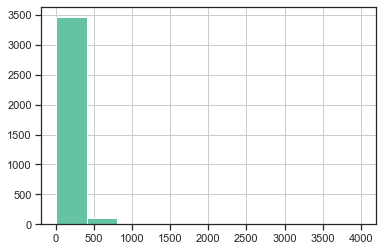

In [14]:
data["price"].hist()

## Predicting review score rating based on categorical and descriptive features 

In [15]:
feat_cat = ["property_type", "room_type"]
feat_num  = ["accommodates", "bathrooms", "bedrooms", "beds"]
tar_1 = "review_scores_rating"

# 0: reduce the data set
X = data[feat_num + feat_cat]
Y = data[tar_1]

# make sure numerical features are numerical, e.g. NaN
mean_num = X[feat_num].mean() # for missing values impute the mean
X["accommodates"] = X["accommodates"].fillna(mean_num["accommodates"])
X["bathrooms"] = X["bathrooms"].fillna(mean_num["bathrooms"])
X["bedrooms"] = X["bedrooms"].fillna(mean_num["bedrooms"])
X["beds"] = X["beds"].fillna(mean_num["beds"])


# 1: convert categorical features into numbers
# binarize the categorial data
# Go through each feature
X["property_type"] = X["property_type"].fillna("NAN")
for feature in feat_cat:
    # Go through each level in this feature (except the last one!)
    for cat in X[feature].unique()[0:-1]:
        # Create new feature for this level
        X[feature + "_" + cat] = pd.Series(X[feature] == cat, dtype=int)
    # Drop original feature
    X = X.drop([feature], 1)


<ipython-input-15-3411db09ed72>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["accommodates"] = X["accommodates"].fillna(mean_num["accommodates"])
<ipython-input-15-3411db09ed72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bathrooms"] = X["bathrooms"].fillna(mean_num["bathrooms"])
<ipython-input-15-3411db09ed72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

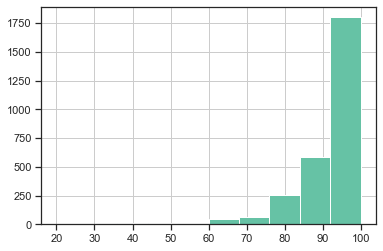

In [16]:
# check distribution of target variable of review score rating to decide how to create buckets
Y.hist()

In [17]:
# 2: convert target of review score rating score into buckets from 1-5(worst - best)
def rating_bucket(x):
    if x < 85:
        return 1
    elif x < 90:
        return 2
    elif x < 95:
        return 3
    else:
        return 4
Y = Y.apply(rating_bucket)

In [18]:
Y.value_counts() # check how balanced our rating buckets are

4    2195
3     670
1     422
2     298
Name: review_scores_rating, dtype: int64

In [19]:
# 3: shuffle data
# 4: split data into test and train set (20% test, 80% train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# fit simple decsion tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 5: fit the model, using training set
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0, n_estimators=10)
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [20]:
# 6: evaluate the model using test set
#print(clf1.predict(X_test)) # predicting using the test set
print("Decsiion Tree Accuracy: ", clf.score(X_test, y_test))    
print("Random forest Accuracy: ", clf1.score(X_test, y_test))              
# 7: print results

Decsiion Tree Accuracy:  0.5453277545327755
Random forest Accuracy:  0.5774058577405857


In [21]:
clf.predict(X_test) == y_test

3163     True
3133     True
937     False
196      True
2852     True
        ...  
288      True
2815     True
2374     True
2923     True
2251     True
Name: review_scores_rating, Length: 717, dtype: bool

In [22]:
from IPython.display import Image

from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, 
                               out_file=dot_name,
                               feature_names=feature_names, 
                               class_names=class_names,
                               proportion=proportion)
        
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -Tpng %s -o %s" % (dot_name, image_name))
    # to get this part to actually work, you may need to open a terminal window in Jupyter and run the following command "sudo apt install graphviz"
    
    # Return the .png image so we can see it
    return Image(filename=image_name)

#visualize_tree(decision_tree, predictor_cols, ["n", "y"])

# Predicting Price

In [23]:
# Import models and evaluation functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

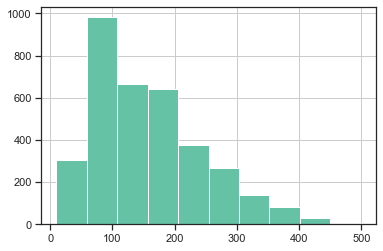

In [24]:
# same for price 
Y2 = data["price"]
Y2.loc[Y2 < 500].hist()

In [25]:
# Create a model - predicting price based on categorical and descriptive features 
logistic_regression = LogisticRegression(max_iter=100)

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, X, Y2, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

C:\Users\altre\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\altre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\altre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

Accuracy of our classifier is 0.067


C:\Users\altre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicting number of reviews, based on description (logistic regression)

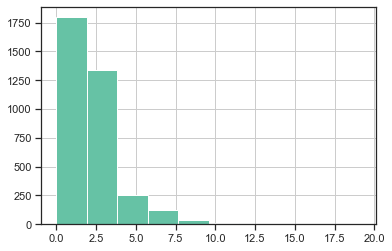

In [78]:
feat_text = ["summary", "space", "description", "neighborhood_overview"]
Xt = data["summary"].fillna("")
Yt = data["reviews_per_month"].fillna(data["reviews_per_month"].mean())

# tfidf vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(Xt)
# Turn these tokens into a numeric matrix
Xt = tfidf_vectorizer.transform(Xt)

# transform number of reviews into buckets
Yt.hist()

def review_buckets(x):
    if x <= 2: 
        return 0
    else:
        return 1
Yt = Yt.apply(review_buckets)

In [79]:
# Create a model
logistic_regression = LogisticRegression(max_iter=100)

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, Xt, Yt, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

Accuracy of our classifier is 0.734


## Predicting Price based on descriptive & categorical features 

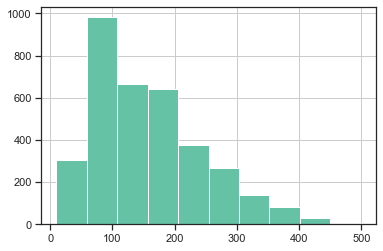

In [80]:
# 0: reduce the data set
# 1: check distribution of target variable of review score rating to decide how to create buckets

tar_2 = "price"
Y = data[tar_2]
Y.loc[Y < 500].hist()

In [81]:
# 2: convert target of price into buckets from 0-500 (lowest - highest)
def price_bucket(x):
    if x < 100:
        return 1
    elif x < 200:
        return 2
    elif x < 300:
        return 3
    elif x < 400:
        return 4
    else:
        return 5
Y = Y.apply(price_bucket)

In [82]:
Y.value_counts() # check how balanced our rating buckets are

2    1321
1    1151
3     715
4     254
5     144
Name: price, dtype: int64

In [83]:
# 3: shuffle data
# 4: split data into test and train set (20% test, 80% train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# fit simple decsion tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 5: fit the model, using training set
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0, n_estimators=10)
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [84]:
# 6: evaluate the model using test set
#print(clf1.predict(X_test)) # predicting using the test set
print("Decision Tree Accuracy: ", clf.score(X_test, y_test))    
print("Random forest Accuracy: ", clf1.score(X_test, y_test))              
# 7: print results

Decsiion Tree Accuracy:  0.5983263598326359
Random forest Accuracy:  0.596931659693166


In [85]:
clf.predict(X_test) == y_test

3163     True
3133    False
937     False
196     False
2852     True
        ...  
288      True
2815     True
2374     True
2923    False
2251    False
Name: price, Length: 717, dtype: bool

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# target variable
Y_price = data["price"]
X2_train, X2_test, price_train, price_test = train_test_split(X, Y_price, test_size=0.2, random_state=42)

 
clf_price_ridge = KNeighborsClassifier(n_neighbors=50)
clf_price_ridge.fit(X_train, y_train)
print("The accuracy of our Nearest Neighbor classifier: ", clf_price_ridge.score(X_test, y_test))

The accuracy of our Nearest Neighbor classifier:  0.6052998605299861


In [35]:
X

,accommodates,bathrooms,bedrooms,beds,property_type_House,property_type_Apartment,property_type_Condominium,property_type_Villa,property_type_Bed & Breakfast,property_type_Townhouse,property_type_Entire Floor,property_type_Loft,property_type_Guesthouse,property_type_Boat,property_type_Dorm,property_type_Other,property_type_NAN,room_type_Entire home/apt,room_type_Private room
0,4,1.5,2.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,1.5,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,3,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3581,2,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3582,4,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3583,2,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
